Author: Jonathan Hernandez

CUNYSPS DATA620 Fall 2018

Email: Jonathan.Hernandez@spsmail.cuny.edu

This assignment looks at the Spambase Dataset from the UCI Machine Learning Repository and tries to build logistic regression and naive Bayes classifier and see which one is more accurate, view the confusion matrix and see which email documents were missclassified.

Dataset: http://archive.ics.uci.edu/ml/datasets/Spambase

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize

In [2]:
# load the data
spambase = pd.read_csv("spambase/spambase.data")

In [3]:
# load attribute names into the spambase dataset
spambase_names = open("spambase/spambase.names", 'r')
attributes = spambase_names.readlines()[33:91]

In [4]:
# extract only the text before the ':' to get each attribute
names = [a[:a.index(':')] for a in attributes]
names.append('spam')

In [5]:
# add the column names
spambase.columns = names
print(spambase.columns)

Index([u'word_freq_make', u'word_freq_address', u'word_freq_all',
       u'word_freq_3d', u'word_freq_our', u'word_freq_over',
       u'word_freq_remove', u'word_freq_internet', u'word_freq_order',
       u'word_freq_mail', u'word_freq_receive', u'word_freq_will',
       u'word_freq_people', u'word_freq_report', u'word_freq_addresses',
       u'word_freq_free', u'word_freq_business', u'word_freq_email',
       u'word_freq_you', u'word_freq_credit', u'word_freq_your',
       u'word_freq_font', u'word_freq_000', u'word_freq_money',
       u'word_freq_hp', u'word_freq_hpl', u'word_freq_george',
       u'word_freq_650', u'word_freq_lab', u'word_freq_labs',
       u'word_freq_telnet', u'word_freq_857', u'word_freq_data',
       u'word_freq_415', u'word_freq_85', u'word_freq_technology',
       u'word_freq_1999', u'word_freq_parts', u'word_freq_pm',
       u'word_freq_direct', u'word_freq_cs', u'word_freq_meeting',
       u'word_freq_original', u'word_freq_project', u'word_freq_re',
       u

In [6]:
## re-map the 0's and 1's as non-spam and spam respectively
spambase.spam = ['spam' if a == 1 else 'non-spam' for a in spambase.spam]

In [7]:
spambase.head(n=10)

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.21               0.28           0.50           0.0   
1            0.06               0.00           0.71           0.0   
2            0.00               0.00           0.00           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   
5            0.00               0.00           0.00           0.0   
6            0.00               0.00           0.00           0.0   
7            0.15               0.00           0.46           0.0   
8            0.06               0.12           0.77           0.0   
9            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.14            0.28              0.21                0.07   
1           1.23            0.19              0.19                0.12   
2           0.63            0.00              0.31                0.63   
3           0.63            0.00              0.31                0.63   
4           1.85            0.00              0.00                1.85   
5           1.92            0.00              0.00                0.00   
6           1.88            0.00              0.00                1.88   
7           0.61            0.00              0.30                0.00   
8           0.19            0.32              0.38                0.00   
9           0.00            0.00              0.96                0.00   

   word_freq_order  word_freq_mail  ...   char_freq_;  char_freq_(  \
0             0.00            0.94  ...          0.00        0.132   
1             0.64            0.25  ...          0.01        0.143   
2             0.31            0.63  ...          0.00        0.137   
3             0.31            0.63  ...          0.00        0.135   
4             0.00            0.00  ...          0.00        0.223   
5             0.00            0.64  ...          0.00        0.054   
6             0.00            0.00  ...          0.00        0.206   
7             0.92            0.76  ...          0.00        0.271   
8             0.06            0.00  ...          0.04        0.030   
9             0.00            1.92  ...          0.00        0.000   

   char_freq_[  char_freq_!  char_freq_$  char_freq_#  \
0          0.0        0.372        0.180        0.048   
1          0.0        0.276        0.184        0.010   
2          0.0        0.137        0.000        0.000   
3          0.0        0.135        0.000        0.000   
4          0.0        0.000        0.000        0.000   
5          0.0        0.164        0.054        0.000   
6          0.0        0.000        0.000        0.000   
7          0.0        0.181        0.203        0.022   
8          0.0        0.244        0.081        0.000   
9          0.0        0.462        0.000        0.000   

   capital_run_length_average  capital_run_length_longest  \
0                       5.114                         101   
1                       9.821                         485   
2                       3.537                          40   
3                       3.537                          40   
4                       3.000                          15   
5                       1.671                           4   
6                       2.450                          11   
7                       9.744                         445   
8                       1.729                          43   
9                       1.312                           6   

   capital_run_length_total  spam  
0                      1028  spam  
1                      2259  spam  
2                       191  spam  
3                       191  spam  
4                        54  spam  
5                       112  spam  
6                        49  spam  
7                      1257  spam  
8                       749  spam

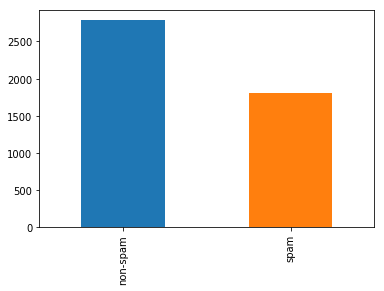

In [8]:
# Data Visualization
spam_counts = pd.Series(spambase.spam).value_counts()
spam_counts.plot.bar()
plt.show()

We see in the above bar graph that there is more email that was classified as non-spam then spam.

Let's start implementing classification algorithms and do analysis.

In [9]:
# split data into a training/dev-test set
X_train, X_test, y_train, y_test = train_test_split(spambase.iloc[:,0:57],
                                                    spambase['spam'],
                                                    test_size = 0.33,
                                                    random_state=4)

The Response or target variable is the 'spam' variable and the other 57 variables mentioned in 

http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names

are the explanatory variables. 

We split the data into a training and test set with 66% of the randomly shuffled data as the training data to implement our classifier algorithms and the other 33% percent for the test data to predict from the algorithm.

Let's start with applying Binary Logistic Regression which will allow us to create a logit function that predicts whether spam or not using all features.

Logit function: https://en.wikipedia.org/wiki/Logit

Logistic Regression: https://en.wikipedia.org/wiki/Logistic_regression

In [10]:
# apply logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train) # fit the data
y_pred = logreg.predict(X_test) # predict the y values given the test training data
print('Accuracy of logistic regression classifier on test set: %10.3f') % (round(logreg.score(X_test, y_test),3))

Accuracy of logistic regression classifier on test set:      0.927


We see that using all features for a logistic regression yields a great accuracy of about 92.7%

Let's print out a confusion matrix which will show us what was classified correctly (diagonals in the matrix) and what was not (true negatives and false positives)

Confusion Matrix: https://en.wikipedia.org/wiki/Confusion_matrix

In [11]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[892  47]
 [ 64 515]]


What does this tell us? This confusion matrix states that 1407 emails were classified correctly and 111 missclassified emails from the test dataset.

Let's see what was missclassified

In [12]:
# Misclassification summary
y_test = np.asarray(y_test)
print("Missclassification Summary of Logistic Regression")
for i in range(len(y_pred)):
    if (y_pred[i] != y_test[i]): # missclassified?
        print('Email# %-8s Predicted label %-12s true label: %-8s') % (i, y_pred[i], y_test[i])

Missclassification Summary of Logistic Regression
Email# 20       Predicted label non-spam     true label: spam    
Email# 38       Predicted label non-spam     true label: spam    
Email# 41       Predicted label non-spam     true label: spam    
Email# 56       Predicted label non-spam     true label: spam    
Email# 77       Predicted label non-spam     true label: spam    
Email# 87       Predicted label spam         true label: non-spam
Email# 109      Predicted label non-spam     true label: spam    
Email# 120      Predicted label spam         true label: non-spam
Email# 143      Predicted label non-spam     true label: spam    
Email# 172      Predicted label spam         true label: non-spam
Email# 232      Predicted label spam         true label: non-spam
Email# 241      Predicted label non-spam     true label: spam    
Email# 262      Predicted label non-spam     true label: spam    
Email# 264      Predicted label spam         true label: non-spam
Email# 300      Predicted 

We could then look at the test data see what features these missclassified observations have and see if the features can be reduced for better accuracy.

Now let's try using a Naive Bayes classifier and see how the results work out on that

Naive Bayes Classifier: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

We'll use a Multinomial Naive Bayes distribution

In [13]:
# Apply Naive Bayes Classification

# Naive bayes multi-nominal
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train) 
y_pred = NB_model.predict(X_test)
print('Accuracy of Naive bayes regression classifier on test set: %10.3f') % (round(NB_model.score(X_test, y_test),3))

Accuracy of Naive bayes regression classifier on test set:      0.791


Using a Naive Bayes classifer with multinomial distribution yields a smaller accuracy of about 79.1%

Let's see the confusion matrix and missclassification

In [14]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[795 144]
 [174 405]]


Confusion matrix from Naive Bayes shows 1200 test emails correctly identified and 318 emails missclassified.

In [15]:
# Misclassification summary
y_test = np.asarray(y_test)
print("Missclassification Summary of Naive Bayes Classification using Multinomial Distribution")
for i in range(len(y_pred)):
    if (y_pred[i] != y_test[i]):
        print('Email# %-8s Predicted label %-12s true label: %-8s') % (i, y_pred[i], y_test[i])

Missclassification Summary of Naive Bayes Classification using Multinomial Distribution
Email# 18       Predicted label spam         true label: non-spam
Email# 20       Predicted label non-spam     true label: spam    
Email# 21       Predicted label non-spam     true label: spam    
Email# 30       Predicted label spam         true label: non-spam
Email# 37       Predicted label spam         true label: non-spam
Email# 41       Predicted label non-spam     true label: spam    
Email# 42       Predicted label non-spam     true label: spam    
Email# 45       Predicted label non-spam     true label: spam    
Email# 49       Predicted label spam         true label: non-spam
Email# 51       Predicted label non-spam     true label: spam    
Email# 54       Predicted label non-spam     true label: spam    
Email# 56       Predicted label non-spam     true label: spam    
Email# 57       Predicted label spam         true label: non-spam
Email# 59       Predicted label non-spam     true labe

Create a function that reads in email text, splits it into words and computes the frequency of the words and characters as well as the capital letter run-length statistics exactly as used in the spambase dataset.

In [16]:
def get_word_char_capitalletter_frequencies_for_dataset(email_text):
    # Get the words to search for to compute the statistics to predict for spam/no spam
    data = {}
    words_search_for = [s.replace('word_freq_', '') for s in spambase.columns]
    # get the characters to search for
    words_search_for = [s.replace('char_freq_', '') for s in words_search_for]
    del words_search_for[54:]
    words = word_tokenize(email_text) # split into words
    words_lower = [w.lower() for w in words]
    fdist = nltk.FreqDist(words_lower) # frequency distribution
    n_words = len(words_lower)
    frequency_summary = [(freq, round(fdist[freq]/float(n_words), 2)) for freq in fdist]
    for w in words_search_for:
        if w in [x[0] for x in frequency_summary]:
            # retrieve the frequency of the found word
            f = [x[0] for x in frequency_summary].index(w)
            if len(w) == 1:
                data['char_freq_' + w] = [frequency_summary[f][1]] # append to the data
            else:
                data['word_freq_' + w] = [frequency_summary[f][1]]
        else: # if not found set data[w] = 0
            if len(w) == 1:
                data['char_freq_' + w] = [0]
            else:
                data['word_freq_' + w] = [0]
    
    # Get total capital letters in email_text
    data['capital_run_length_total'] = sum(1 for s in email_text if s.isupper())
    
    # now get consecutive capital letters; compute the average and longest run
    ctr = 0
    l = []
    for c in email_text:
        if c.isupper():
            ctr = ctr +1
        else:
            l.append(ctr)
            ctr = 0
    
    data['capital_run_length_longest'] = max(l)
    data['capital_run_length_average'] = np.mean(l)
    
    return pd.DataFrame.from_dict(data)

Now let's do some predictions see spam email examples below.

Example 1: http://www.linuxfocus.org/common/src/article279/spam_samples.html

Example 2: http://web.mit.edu/network/spam/examples/hey.html

In [17]:
email_text = "It has come to our attention that you may be entitled to an undisclosed amount of unclaimed funds. If so, these funds are currently reserved in your name and waiting or you to claim. Please enter your name at the unclaimed money search enginelocated at our site. Click Here Notification Date: 10/15/02 to 11/15/02 Unclaimed Funds Department Found Money.com"

data_sample = get_word_char_capitalletter_frequencies_for_dataset(email_text)

pred_data_sample_logreg = logreg.predict(data_sample)
print("Logistic Regression classified the email text as %s") % (pred_data_sample_logreg)

pred_data_sample_naivebayes = NB_model.predict(data_sample)
print("Naive Bayes classified the email text as %s") % (pred_data_sample_naivebayes)

Logistic Regression classified the email text as ['non-spam']
Naive Bayes classified the email text as ['non-spam']


Example 1 had Both classified it as not spam. It's a tricky email and one could get fooled by it when it actually is spam.

Example 2 is also spam used as adult content and is common let's see how the classifers work.

In [26]:
email_text = """HI!  My name is Samantha. 


I'm 18 and a freshman at college. I just learned 

how to make a web page and thought you might 

enjoy seeing some picturesofmeandmyfriends. 


I like this better then working my way thru college. 

So come and Check out My Friends! We Are hot and Naked! Trust Me! We Experiment Alot! 


Check us out by: ClickingHere!"""

data_sample = get_word_char_capitalletter_frequencies_for_dataset(email_text)

pred_data_sample_logreg = logreg.predict(data_sample)
print("Logistic Regression classified the email text as %s") % (pred_data_sample_logreg)

pred_data_sample_naivebayes = NB_model.predict(data_sample)
print("Naive Bayes classified the email text as %s") % (pred_data_sample_naivebayes)

Logistic Regression classified the email text as ['spam']
Naive Bayes classified the email text as ['non-spam']


Finally, lets see if both classifiers can see that the below valid (non-spam) email is properly classified

In [27]:
email_text = """Hi Jonathan, 

Your market order to buy 1 share of APRN was executed at an average price of $1.49 on November 6th 2018 at 9:51 AM. 

Your trade confirmation will be available in your account settings on Robinhood in one trading day.

If you have any questions, please contact support@robinhood.com."""

data_sample = get_word_char_capitalletter_frequencies_for_dataset(email_text)

pred_data_sample_logreg = logreg.predict(data_sample)
print("Logistic Regression classified the email text as %s") % (pred_data_sample_logreg)

pred_data_sample_naivebayes = NB_model.predict(data_sample)
print("Naive Bayes classified the email text as %s") % (pred_data_sample_naivebayes)

Logistic Regression classified the email text as ['non-spam']
Naive Bayes classified the email text as ['non-spam']


Classified correctly as expected.

### Summary

- We saw that logistic regression had a better accuracy and labeled email correctly slightly beter than Naive Bayes did. This can be identified in the confusion matrix of each classifier.

- Future work would be to use automated feature selection to find features that are best used with low p-values. Examples can be backward and forward feature selection or using LASSO (Least Absolute Shrinkage and Selection Operator).

- The attributes of this dataset from UCI machine learning repository are good but I feel there should be more attributes such as the word frequency of popular spam topics such as adult content, money scams, which may help train classifiers better when identifying spam

- Splitting the data randomly using training-test (66% training and 33% test) gives decent results.

- No spam classifier is perfect and it helps to know what are the latest trends in what is spam and what is not.

- Modern spam emails are more clever and can bypass spam filters.

- The best spam filter is yourself and using your own judgement. Educate yourself on what to do if you see a suspicious email and if you feel it is spam, delete the email and move on.